In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(1234)

import pandas as pd
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
import altair as alt

## Load data sets

In [32]:
# load in data sets for both math and portuguese student performance
mat_scores_df = pd.read_csv('../data/student-mat.csv', delimiter=";")
por_scores_df = pd.read_csv('../data/student-por.csv', delimiter=";")

## Split test and train for each data set, saving to csv

In [37]:
# math data split for train/test
X_mat = mat_scores_df.drop(columns=['G3'])
y_mat = mat_scores_df[['G3']]

X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(X_mat, 
                                                        y_mat, 
                                                        test_size=0.20, 
                                                        random_state=100)

# merge X and y columns for train and test sets, save to csv
mat_train = X_train_mat
mat_train['G3'] = y_train_mat
mat_train.to_csv('../data/student-mat-trainsplit.csv')

mat_test = X_test_mat
mat_test['G3'] = y_test_mat
mat_test.to_csv('../data/student-mat-testsplit.csv')

In [38]:
# portuguese data split for train/test
X_por = por_scores_df.drop(columns=['G3'])
y_por = por_scores_df[['G3']]

X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(X_por, 
                                                    y_por, 
                                                    test_size=0.20, 
                                                    random_state=100)

# merge X and y columns for train and test sets, save to csv
por_train = X_train_por
por_train['G3'] = y_train_por
por_train.to_csv('../data/student-por-trainsplit.csv')

por_test = X_test_por
por_test['G3'] = y_test_por
por_test.to_csv('../data/student-por-testsplit.csv')

## Generate and explore profiling reports for the data frames

In [40]:
# generate pandas profiling reports for each training set
mat_profile = ProfileReport(mat_train, title='Pandas Profiling Report for Math', html={'style':{'full_width':True}})
por_profile = ProfileReport(por_train, title='Pandas Profiling Report for Portuguese', html={'style':{'full_width':True}})

In [46]:
mat_train.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [45]:
por_train.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [41]:
mat_profile

In [42]:
por_profile

## Observations & Questions
- There's a high correlation between G3 (final grade from period 3) and G2 (the grade from period 2) in both data sets
 - Similarly, G1 is highly correlated
 - Consider excluding G1 and G2 from our predictive model?
- Numeric vs Categorical feature counts from the profiling output 
 - Default settings have given us different variable types in each data set (13 & 13 vs  14 & 12)
 - Manually specify each column type to mitigate?


## Initial Plots

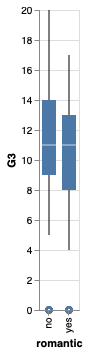

In [52]:
alt.Chart(mat_train).mark_boxplot().encode(
    x='romantic:N',
    y='G3:Q'
)

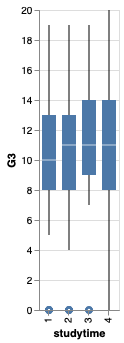

In [53]:
alt.Chart(mat_train).mark_boxplot().encode(
    x='studytime:N',
    y='G3:Q'
)

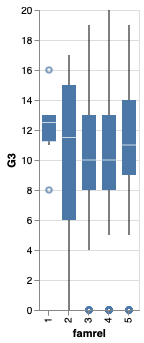

In [54]:
alt.Chart(mat_train).mark_boxplot().encode(
    x='famrel:N',
    y='G3:Q'
)